In [2]:
!pip install pandas_profiling
!pip install lightgbm
!pip install fast-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 53.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 74.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 38.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=8e14582c354944dd5451edb897e1dcd67fb06f3aecadfc8f80a26af626deac51
  Stored in directory: /home/jovyan/.cache/pip/wheels/ea/1c/a8/5cec3479cd45136a7111e2d96aac299b219b199c411665250b
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 6.1 MB/s eta 0:00:00


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from fast_ml import eda
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features
from sklearn.ensemble import IsolationForest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import HistGradientBoostingRegressor, ExtraTreesRegressor
import lightgbm

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score

import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv('Admission_Predict.csv')
df.drop(columns='Serial No.', inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [8]:
profile = ProfileReport(df)
profile.to_file('profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.skew() # -0.5 to 0.5 -> normally distributed

GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

In [6]:
df.duplicated().sum()

0

In [7]:
df.T.duplicated().sum()

0

In [8]:
# One of the most useful dataframe summary view
summary_df = eda.df_info(df)
display_all(summary_df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
GRE Score,int64,Numerical,49,"[337, 324, 316, 322, 314, 330, 321, 308, 302, ...",0,0.0
TOEFL Score,int64,Numerical,29,"[118, 107, 104, 110, 103, 115, 109, 101, 102, ...",0,0.0
University Rating,int64,Numerical,5,"[4, 3, 2, 5, 1]",0,0.0
SOP,float64,Numerical,9,"[4.5, 4.0, 3.0, 3.5, 2.0, 5.0, 1.5, 1.0, 2.5]",0,0.0
LOR,float64,Numerical,9,"[4.5, 3.5, 2.5, 3.0, 4.0, 1.5, 2.0, 5.0, 1.0]",0,0.0
CGPA,float64,Numerical,184,"[9.65, 8.87, 8.0, 8.67, 8.21, 9.34, 8.2, 7.9, ...",0,0.0
Research,int64,Numerical,2,"[1, 0]",0,0.0
Chance of Admit,float64,Numerical,61,"[0.92, 0.76, 0.72, 0.8, 0.65, 0.9, 0.75, 0.68,...",0,0.0


In [9]:
get_constant_features(df)

,Desc,Var,Value,Perc


GRE Score               AxesSubplot(0.125,0.786098;0.352273x0.0939024)
TOEFL Score          AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
University Rating       AxesSubplot(0.125,0.673415;0.352273x0.0939024)
SOP                  AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
LOR                     AxesSubplot(0.125,0.560732;0.352273x0.0939024)
CGPA                 AxesSubplot(0.547727,0.560732;0.352273x0.0939024)
Research                AxesSubplot(0.125,0.448049;0.352273x0.0939024)
Chance of Admit      AxesSubplot(0.547727,0.448049;0.352273x0.0939024)
dtype: object

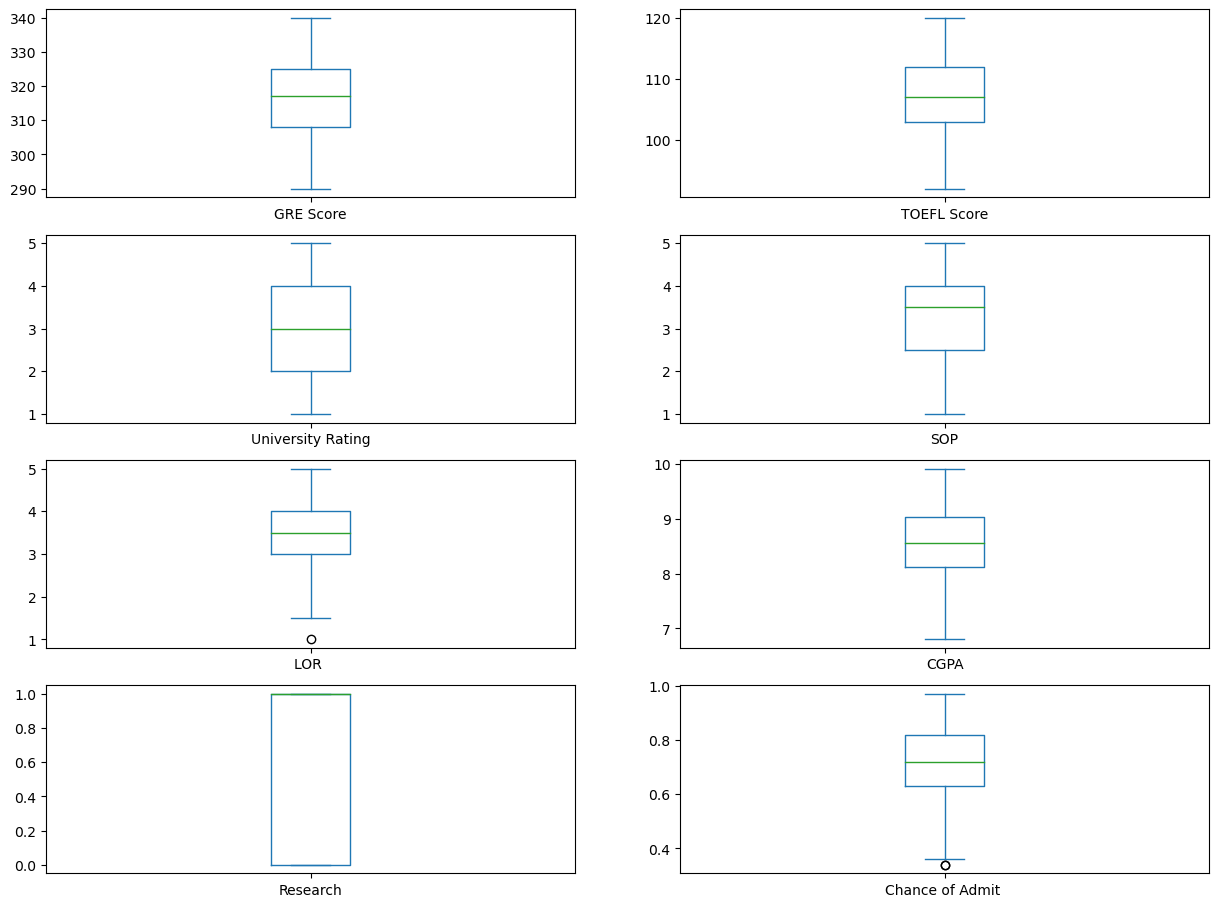

In [16]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

In [16]:
iso = IsolationForest()

In [17]:
iso_new = iso.fit_predict(df)

In [18]:
np.where(iso_new==-1)

(array([  5,   8,   9,  21,  23,  24,  25,  26,  27,  28,  29,  32,  33,
         37,  38,  39,  42,  43,  47,  50,  52,  53,  57,  58,  64,  65,
         66,  70,  71,  75,  78,  79,  81,  91,  92,  93,  94,  95,  97,
        107, 109, 110, 115, 117, 118, 119, 122, 125, 127, 130, 131, 132,
        133, 138, 139, 140, 141, 143, 145, 148, 159, 160, 161, 165, 168,
        187, 202, 203, 212, 213, 222, 240, 254, 258, 259, 260, 263, 268,
        269, 272, 273, 284, 288, 292, 293, 297, 317, 318, 329, 344, 345,
        347, 348, 359, 367, 368, 369, 372, 374, 376, 377, 379, 384, 385,
        388, 399, 406, 408, 410, 411, 412, 413, 425, 429, 433, 436, 437,
        438, 441, 446, 452, 457, 464, 465, 467, 483, 487, 491, 492, 493,
        494, 496, 497, 498, 499]),)

In [27]:
df['LOR '].quantile(0.01)

1.5

In [28]:
df[df['LOR '] < df['LOR '].quantile(0.01)]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


In [29]:
df['Chance of Admit '].quantile(0.01)

0.3799

In [30]:
df[df['Chance of Admit '] < df['Chance of Admit '].quantile(0.01)]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.80,1,0.36
92,298,98,2,4.0,3.0,8.03,0,0.34
94,303,99,3,2.0,2.5,7.66,0,0.36
376,297,96,2,2.5,2.0,7.43,0,0.34
457,295,99,1,2.0,1.5,7.57,0,0.37


## VIF

In [32]:
VIF = pd.DataFrame()

In [33]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [35]:
std = StandardScaler()
Xscale = std.fit_transform(X)

In [36]:
VIF['Columns'] = X.columns

In [44]:
VIF['vif'] = [variance_inflation_factor(Xscale,i) for i in range(X.shape[1])]

In [45]:
VIF

,Columns,vif
0,GRE Score,4.464249
1,TOEFL Score,3.904213
2,University Rating,2.621036
3,SOP,2.835210
4,LOR,2.033555
5,CGPA,4.777992
6,Research,1.494008


### Although GRE Score, CGPA and TOEFL Score look close to 'highly' correlated, there is no need to drop columns.

In [49]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=42)

In [50]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((350, 7), (150, 7), (350,), (150,))

# HistGBM

In [51]:
clf = HistGradientBoostingRegressor()

In [52]:
clf.fit(Xtrain, ytrain)

HistGradientBoostingRegressor()

In [53]:
r2_score(ytest, clf.predict(Xtest))

0.7788666921155867

In [54]:
params = {'learning_rate':[0.05, 0.1, 0.2, 0.3, 0.5],
         'max_leaf_nodes':range(2,35),
         'max_depth':range(2,30), 
         'min_samples_leaf':range(2,30),
         'l2_regularization': [0.1, 0.2, 0.3, 0.5, 0.7], 
         'max_bins' : [50, 100, 150, 255, 300]}

In [55]:
tune = RandomizedSearchCV(clf, params, n_iter=10, n_jobs=-1, cv = KFold(5), verbose = 8)

In [ ]:
tune.fit(Xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [45]:
tune.best_estimator_

HistGradientBoostingRegressor(l2_regularization=0.5, learning_rate=0.05,
                              max_bins=150, max_depth=18, max_leaf_nodes=16,
                              min_samples_leaf=16)

In [46]:
new_clf = HistGradientBoostingRegressor(l2_regularization=0.5, learning_rate=0.05,
                              max_bins=150, max_depth=18, max_leaf_nodes=16,
                              min_samples_leaf=16)

In [47]:
new_clf.fit(Xtrain, ytrain)

HistGradientBoostingRegressor(l2_regularization=0.5, learning_rate=0.05,
                              max_bins=150, max_depth=18, max_leaf_nodes=16,
                              min_samples_leaf=16)

In [48]:
r2_score(ytest, new_clf.predict(Xtest))

0.7968379074245767

In [49]:
scores = cross_val_score(new_clf, Xtrain, ytrain, scoring='r2', cv = KFold(5))

In [64]:
# Training accuracy
print(scores.mean())
print(scores)

0.7213047684424009
[0.6392179  0.73652879 0.66087452 0.76186071 0.80804193]


In [65]:
#Testing accuracy
scores = cross_val_score(new_clf, Xtest, ytest, scoring='r2', cv = KFold(5))
print(scores.mean())
print(scores)

0.8020484239059906
[0.77703334 0.86129286 0.68455355 0.83779555 0.84956682]


# Light GBM

In [66]:
import lightgbm
lgbm = lightgbm.LGBMRegressor()

In [67]:
lgbm.fit(Xtrain, ytrain)

LGBMRegressor()

In [68]:
#r2_score(ytest, lgbm.predict(Xtest))
scores = cross_val_score(lgbm, Xtrain, ytrain, scoring='r2', cv = KFold(5))
print(scores, "\n",scores.mean())

[0.68302053 0.77444184 0.6981166  0.78572433 0.83742777] 
 0.7557462146297528


In [77]:
params = {
         'num_leaves':range(5,200),
         'max_depth':range(2,20),
         'max_bin':range(50,301,50),
         'min_data_in_bin':range(5,20),
          'learning_rate': [0.05,0.1,0.2,0.3,0.5,0.7],
          'n_estimators': [50,100,150,200,250,300,350]
         }

In [78]:
tune = RandomizedSearchCV(lgbm, params, n_iter=10, n_jobs=-1, cv = KFold(10))

In [79]:
tune.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.5, 0.7],
                                        'max_bin': range(50, 301, 50),
                                        'max_depth': range(2, 20),
                                        'min_data_in_bin': range(5, 20),
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350],
                                        'num_leaves': range(5, 200)})

In [80]:
tune.best_estimator_

LGBMRegressor(learning_rate=0.05, max_bin=100, max_depth=3, min_data_in_bin=8,
              n_estimators=150, num_leaves=98)

In [81]:
new_lgbm = lightgbm.LGBMRegressor(learning_rate=0.05, max_bin=100, max_depth=3, min_data_in_bin=8,
              n_estimators=150, num_leaves=98)

In [82]:
 new_lgbm.fit(Xtrain, ytrain)

LGBMRegressor(learning_rate=0.05, max_bin=100, max_depth=3, min_data_in_bin=8,
              n_estimators=150, num_leaves=98)

In [83]:
# training accuracy
scores = cross_val_score(new_lgbm, Xtrain, ytrain, scoring='r2', cv = KFold(5))
print(scores, "\nMean Score = ",scores.mean())

[0.69670448 0.79044713 0.70044808 0.79248309 0.8535294 ] 
Mean Score =  0.7667224374530264


In [84]:
#Testing accuracy
scores = cross_val_score(new_lgbm, Xtest, ytest, scoring='r2', cv = KFold(5))
print(scores.mean())
print(scores)

0.7508058381867649
[0.73206855 0.7948449  0.58022411 0.83462538 0.81226626]


# HistGBM predicted better than LightGBM

In [85]:
sort = new_lgbm.feature_importances_.argsort()

Text(0.5, 0, 'Feature Importance')

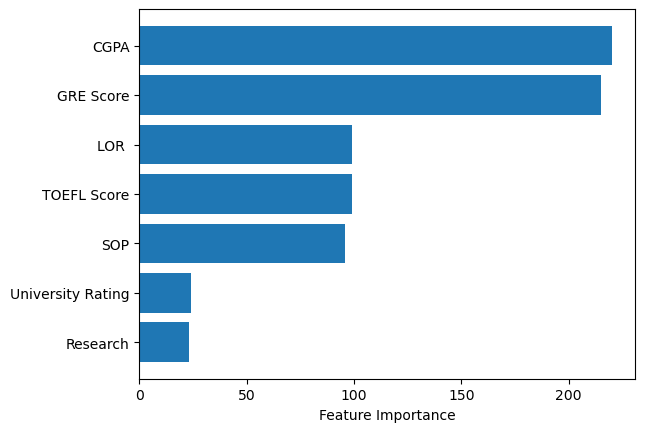

In [86]:
plt.barh(df.columns[sort], new_lgbm.feature_importances_[sort])
plt.xlabel("Feature Importance")

# CGPA and GRE Score very important for post-graduate selection